In [1]:
import pandas as pd
import seaborn as sns

In [2]:
t = pd.read_csv('Titanic_train.csv')
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
t1=t.drop(['PassengerId','Ticket','Name','Fare','Cabin'],axis=1)
t1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [5]:
t1[t1.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,C
863,0,3,female,NaN,8,2,S
868,0,3,male,NaN,0,0,S
878,0,3,male,NaN,0,0,S


<Axes: >

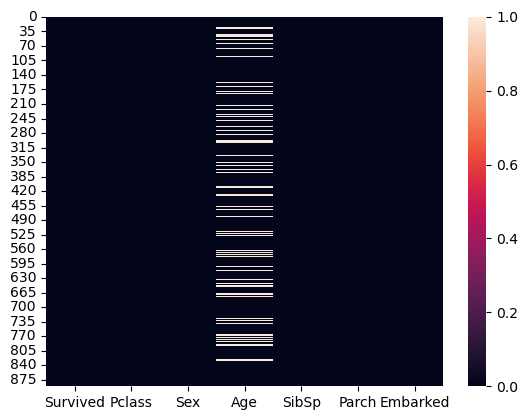

In [6]:
sns.heatmap(t1.isnull())

# Predicting the Test data

In [7]:
t3=t1.dropna()
t3 

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [8]:
t3=t3.drop(['Pclass','SibSp'],axis=1)
t3=pd.get_dummies(t3,dtype='int')
t3

,Survived,Age,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,0,0,1,0,0,1
1,1,38.0,0,1,0,1,0,0
2,1,26.0,0,1,0,0,0,1
3,1,35.0,0,1,0,0,0,1
4,0,35.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
885,0,39.0,5,1,0,0,1,0
886,0,27.0,0,0,1,0,0,1
887,1,19.0,0,1,0,0,0,1
889,1,26.0,0,0,1,1,0,0


In [9]:
x1 = t3.iloc[:,1:]
y1 = t3.iloc[:,0]

In [10]:
from sklearn.linear_model import LogisticRegression
Survived1 = LogisticRegression()
Survived1.fit(x1,y1)

LogisticRegression()

In [11]:
 predict_y1=Survived1.predict(x1)

In [12]:
predict =pd.DataFrame({'Predicted_prob':predict_y1 ,'Actual':y1})
predict

,Predicted_prob,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
886,0,0
887,1,1
889,0,1


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y1,predict_y1)
print(confusion_matrix1)

[[361  63]
 [ 93 195]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y1,predict_y1))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       424
           1       0.76      0.68      0.71       288

    accuracy                           0.78       712
   macro avg       0.78      0.76      0.77       712
weighted avg       0.78      0.78      0.78       712



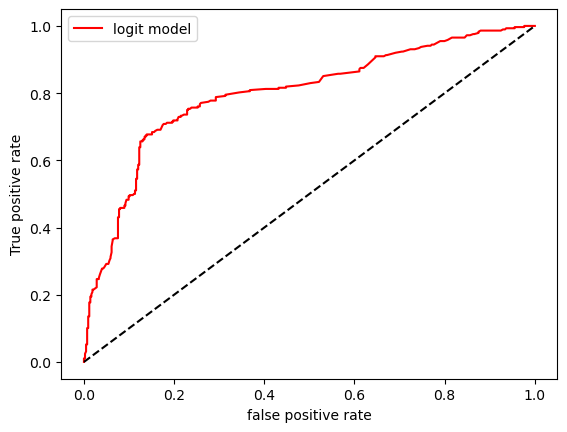

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(y1,Survived1.predict_proba(x1)[:,1])
auc= roc_auc_score(y1,Survived1.predict(x1))
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [16]:
test=pd.read_csv("Titanic_test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
test2=test.drop(['Cabin','Ticket','Fare','Name','Pclass','PassengerId','SibSp'],axis=1)
test2

,Sex,Age,Parch,Embarked
0,male,34.5,0,Q
1,female,47.0,0,S
2,male,62.0,0,Q
3,male,27.0,0,S
4,female,22.0,1,S
...,...,...,...,...
413,male,NaN,0,S
414,female,39.0,0,C
415,male,38.5,0,S
416,male,NaN,0,S


In [18]:
test_x1=pd.get_dummies(test2,dtype='int')
test_x1

,Age,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,1,0,1,0
1,47.0,0,1,0,0,0,1
2,62.0,0,0,1,0,1,0
3,27.0,0,0,1,0,0,1
4,22.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...
413,NaN,0,0,1,0,0,1
414,39.0,0,1,0,1,0,0
415,38.5,0,0,1,0,0,1
416,NaN,0,0,1,0,0,1


In [19]:
test_x1[test_x1.isnull().any(axis=1)]

,Age,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
10,NaN,0,0,1,0,0,1
22,NaN,0,1,0,0,0,1
29,NaN,0,0,1,1,0,0
33,NaN,2,1,0,0,0,1
36,NaN,0,1,0,0,0,1
...,...,...,...,...,...,...,...
408,NaN,0,1,0,0,1,0
410,NaN,0,1,0,0,1,0
413,NaN,0,0,1,0,0,1
416,NaN,0,0,1,0,0,1


In [20]:
test_x1=test_x1.dropna()
test_x1

,Age,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,1,0,1,0
1,47.0,0,1,0,0,0,1
2,62.0,0,0,1,0,1,0
3,27.0,0,0,1,0,0,1
4,22.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...
409,3.0,1,1,0,0,0,1
411,37.0,0,1,0,0,1,0
412,28.0,0,1,0,0,0,1
414,39.0,0,1,0,1,0,0


In [22]:
test_x1[test_x1.isnull().any(axis=1)]

,Age,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S


In [23]:
test_y1 = Survived1.predict(test_x1)
test_y1_df=pd.DataFrame({'Predicted_prob': test_y1,'Age':test_x1.Age,'Parch':test_x1.Parch,'input-female': test_x1.Sex_female,'input_male':test_x1.Sex_male,'Embarked_C':test_x1.Embarked_C,'Embarked_Q':test_x1.Embarked_Q,'Embarked_S':test_x1.Embarked_S})

In [24]:
auc

0.764249213836478

In [25]:
import pickle
filename = 'survived.pkl'
pickle.dump(Survived1,open(filename,'wb'))

In [26]:
test_x1.columns

Index(['Age', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [27]:
t3.Parch.value_counts()

Parch
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [28]:
test_y1_df

,Predicted_prob,Age,Parch,input-female,input_male,Embarked_C,Embarked_Q,Embarked_S
0,0,34.5,0,0,1,0,1,0
1,1,47.0,0,1,0,0,0,1
2,0,62.0,0,0,1,0,1,0
3,0,27.0,0,0,1,0,0,1
4,1,22.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...
409,1,3.0,1,1,0,0,0,1
411,1,37.0,0,1,0,0,1,0
412,1,28.0,0,1,0,0,0,1
414,1,39.0,0,1,0,1,0,0
